# Импорт

In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [2]:
field_size = 12

In [3]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 - 100 * np.eye(field_size)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 - 100 * np.eye(field_size)

In [4]:
print(feromon_map)

[[-9.90338877e+01  6.39368031e-01  2.88153986e-01  3.45490468e-01
   1.30042972e-01  3.51336562e-01  8.78944470e-01  3.15250863e-01
   9.59318651e-01  5.40738696e-01  8.04583852e-01  6.60226944e-01]
 [ 6.39368031e-01 -9.92713199e+01  8.81076521e-01  2.16186505e-01
   5.19603408e-01  4.54669179e-01  1.82317002e-01  7.61440660e-01
   3.73763820e-01  7.17683872e-01  6.25159722e-01  6.05367634e-01]
 [ 2.88153986e-01  8.81076521e-01 -9.91315781e+01  5.49401445e-01
   5.88809944e-01  5.92008211e-01  6.68554100e-01  7.31770400e-01
   2.38693273e-01  3.89686881e-01  6.14117175e-01  6.18335626e-01]
 [ 3.45490468e-01  2.16186505e-01  5.49401445e-01 -9.93493565e+01
   6.35828702e-01  1.64806891e-01  1.50654357e-01  2.32682978e-01
   4.92360549e-01  7.02646875e-01  4.81226001e-01  3.80911760e-01]
 [ 1.30042972e-01  5.19603408e-01  5.88809944e-01  6.35828702e-01
  -9.98478215e+01  6.04471454e-01  4.55319225e-01  4.26246475e-01
   6.10363473e-01  2.91992999e-01  4.59716304e-01  1.83594371e-01]
 [ 3.

In [5]:
print(distance_map)

[[-99.4937357    0.35703286   0.85921988   0.35153944   0.24838566
    0.66442459   0.24361292   0.41897917   0.30925507   0.56379976
    0.21729706   0.70643428]
 [  0.35703286 -99.40236515   0.32295186   0.95612677   0.40269402
    0.52058349   0.14617006   0.62980465   0.77969581   0.54426261
    0.2616715    0.52641776]
 [  0.85921988   0.32295186 -99.25879344   0.19514879   0.43101337
    0.3131374    0.39163739   0.68560256   0.31388118   0.52018781
    0.73705418   0.4899974 ]
 [  0.35153944   0.95612677   0.19514879 -99.24394429   0.52615734
    0.55053048   0.68189393   0.78585975   0.65548871   0.87288077
    0.61845818   0.56230319]
 [  0.24838566   0.40269402   0.43101337   0.52615734 -99.88724716
    0.22209934   0.58947348   0.72550147   0.50380431   0.73721864
    0.61286017   0.4430239 ]
 [  0.66442459   0.52058349   0.3131374    0.55053048   0.22209934
  -99.41425951   0.22443644   0.54748186   0.17985046   0.8173678
    0.64997261   0.74243589]
 [  0.24361292   0.1461

In [6]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, field_size))

In [7]:
def random_experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size), 
                              np.random.randint(0, field_size)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [8]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=pos, 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [9]:
ants_collection = [[Ant(walk_distance=field_size//3, a=1, b=2) for _ in range(n*2)] for n in range(1, 8)]
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*3, feromon_erosion_speed=0.7)


# Опыт

In [10]:
results = list()
for ants in ants_collection:
    time_map = feromon_map
    for ant in ants:
        time_map = random_experement(ant=ant, 
                                     feromon_map_updater=feromon_map_updater, 
                                     feromon_map=time_map, 
                                     distance_map=distance_map, 
                                     num_of_iteration=20)
    results.append(time_map)

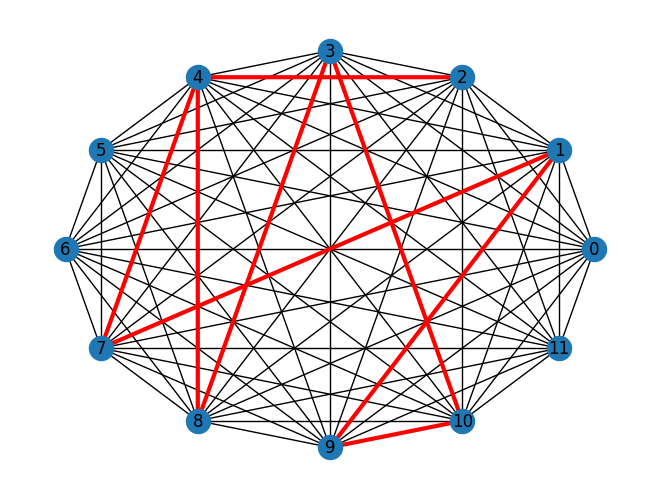

In [11]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)


nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=edges_res, edge_color='r', arrows=True, width=3)


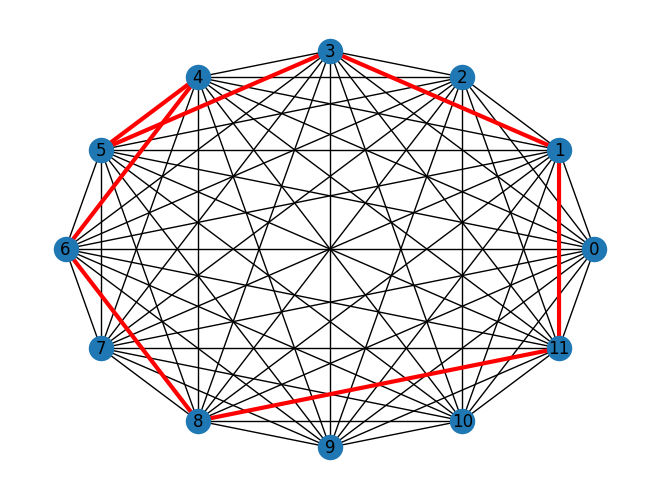

In [12]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K2 = nx.Graph()

for start, end, length in edges:
    K2.add_edge(start, end, length=length)


nx.draw_circular(K2, with_labels = True)
nx.draw_networkx_edges(K2, nx.circular_layout(K2), edgelist=edges_res, edge_color='r', arrows=True, width=3)


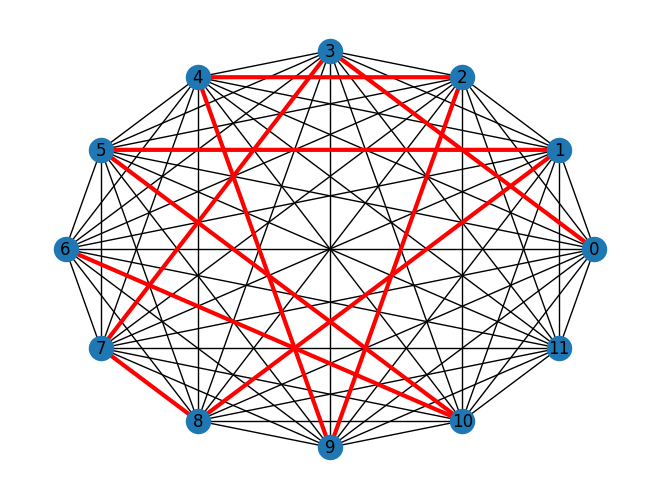

In [13]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K3 = nx.Graph()

for start, end, length in edges:
    K3.add_edge(start, end, length=length)


nx.draw_circular(K3, with_labels = True)
nx.draw_networkx_edges(K3, nx.circular_layout(K3), edgelist=edges_res, edge_color='r', arrows=True, width=3)


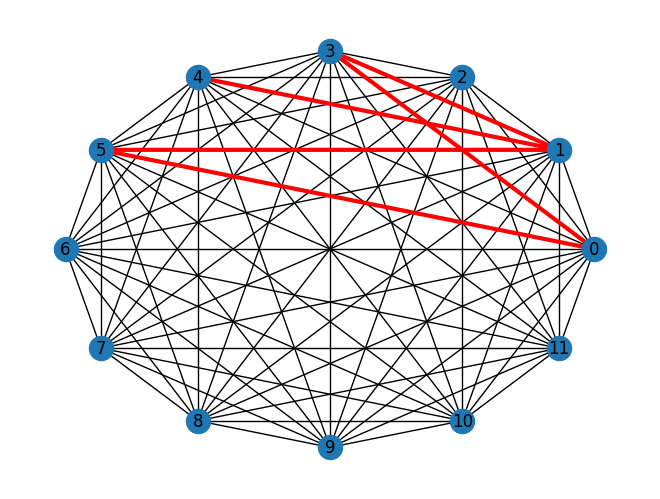

In [14]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K4 = nx.Graph()

for start, end, length in edges:
    K4.add_edge(start, end, length=length,color='r',weight=2)


nx.draw_circular(K4, with_labels = True)
nx.draw_networkx_edges(K4, nx.circular_layout(K4), edgelist=edges_res, edge_color='r', arrows=True, width=3)


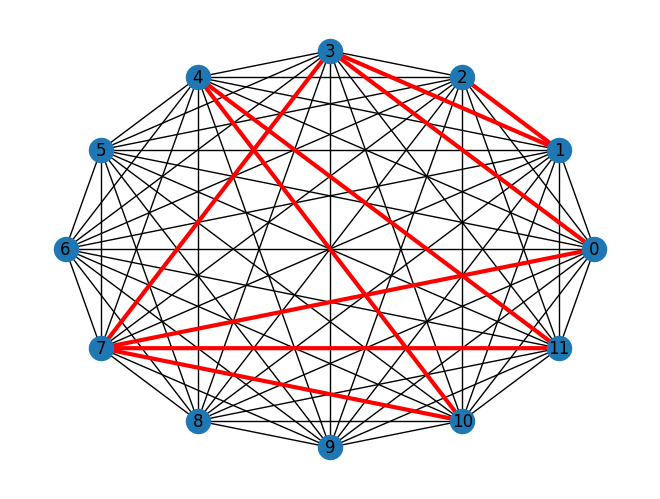

In [15]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K5 = nx.Graph()

for start, end, length in edges:
    K5.add_edge(start, end, length=length)


nx.draw_circular(K5, with_labels = True)
nx.draw_networkx_edges(K5, nx.circular_layout(K5), edgelist=edges_res, edge_color='r', arrows=True, width=3)


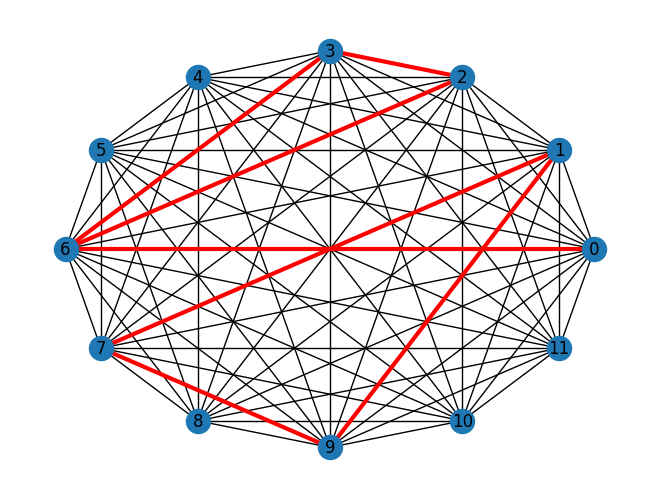

In [16]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K6 = nx.Graph()

for start, end, length in edges:
    K6.add_edge(start, end, length=length)


nx.draw_circular(K6, with_labels = True)
nx.draw_networkx_edges(K6, nx.circular_layout(K6), edgelist=edges_res, edge_color='r', arrows=True, width=3)


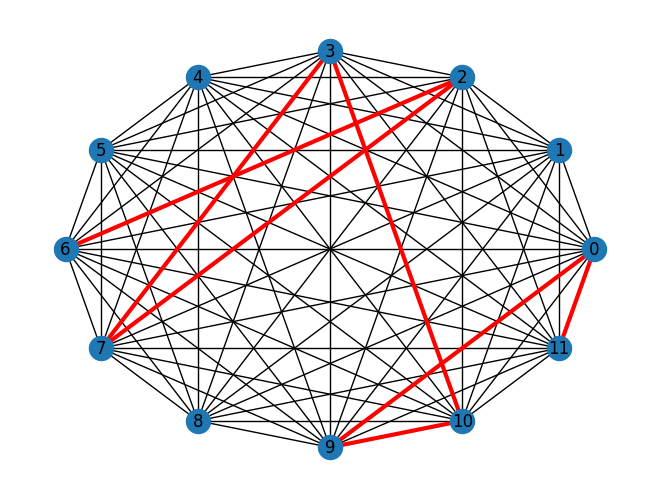

In [17]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K7 = nx.Graph()

for start, end, length in edges:
    K7.add_edge(start, end, length=length)


nx.draw_circular(K7, with_labels = True)
nx.draw_networkx_edges(K7, nx.circular_layout(K7), edgelist=edges_res, edge_color='r', arrows=True, width=3)
